# M31 Spectra Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap
from astropy.io import fits
from specutils import Spectrum1D, SpectralRegion
from astropy import units as u 
from specutils.fitting import fit_generic_continuum
from scipy.signal import medfilt

In [2]:
c0f=fits.open('Data-set/y2io010et_c0f.fits')
c1f=fits.open('Data-set/y2io010et_c1f.fits')
c2f=fits.open('Data-set/y2io010et_c2f.fits')
c4f=fits.open('Data-set/y2io010et_c4f.fits')
c5f=fits.open('Data-set/y2io010et_c5f.fits')
c7f=fits.open('Data-set/y2io010et_c7f.fits')
file=[c0f,c1f,c2f,c4f,c5f,c7f]

Data-set is printed to see how data is stored in the fits file.

In [3]:
for i in range(len(file)):
    print(file[i].info())
    print("-------------------------------------------------------------------------------------------- \n ---------------------------------------------")

Filename: Data-set/y2io010et_c0f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (2064, 15)   float32   
  1  y2io010et_cvt.c0h.tab    1 TableHDU       157   15R x 21C   [D25.17, E15.7, E15.7, E15.7, E15.7, D25.17, D25.17, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, A4, E15.7, E15.7, E15.7, E15.7, E15.7]   
None
-------------------------------------------------------------------------------------------- 
 ---------------------------------------------
Filename: Data-set/y2io010et_c1f.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (2064, 15)   float32   
  1  y2io010et_cvt.c1h.tab    1 TableHDU       157   15R x 21C   [D25.17, E15.7, E15.7, E15.7, E15.7, D25.17, D25.17, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, A4, E15.7, E15.7, E15.7, E15.7, E15.7]   
None
-------------------------------------------------------------------------------------------- 
 ----------

In [4]:
for i in range(len(file)):
    print("File {}\n".format(i),file[i][0].header)
    print("-------------------------------------------------------------------------------------------- \n ---------------------------------------------")

File 0


 SIMPLE  =                    T / FITS STANDARD                                  BITPIX  =                  -32 / FITS BITS/PIXEL                                NAXIS   =                    2 / NUMBER OF AXES                                 NAXIS1  =                 2064 /                                                NAXIS2  =                   15 /                                                EXTEND  =                    T / There maybe standard extensions                BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     BZERO   =                0.0E0 /                                                OPSIZE  =                  896 / PSIZE of original image                        ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     FITSDATE= '2004-03-21'         / Date FITS file was created                     FILENAME= 'y2io010et_cvt.c0h'  / Original filename                              ALLG-MAX=           6.817517E3 / Data m

-------------------------------------------------------------------------------------------- 
 ---------------------------------------------
File 1


 SIMPLE  =                    T / FITS STANDARD                                  BITPIX  =                  -32 / FITS BITS/PIXEL                                NAXIS   =                    2 / NUMBER OF AXES                                 NAXIS1  =                 2064 /                                                NAXIS2  =                   15 /                                                EXTEND  =                    T / There maybe standard extensions                BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     BZERO   =                0.0E0 /                                                OPSIZE  =                  896 / PSIZE of original image                        ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     FITSDATE= '2004-03-21'         / Date FITS file was created                     FILENAME= 'y2io010et_cvt.c1h'  / Original filename                              ALLG-MAX=         1.325503E-15 / Data m

-------------------------------------------------------------------------------------------- 
 ---------------------------------------------
File 2


 SIMPLE  =                    T / FITS STANDARD                                  BITPIX  =                  -32 / FITS BITS/PIXEL                                NAXIS   =                    2 / NUMBER OF AXES                                 NAXIS1  =                 2064 /                                                NAXIS2  =                   15 /                                                EXTEND  =                    T / There maybe standard extensions                BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     BZERO   =                0.0E0 /                                                OPSIZE  =                  896 / PSIZE of original image                        ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     FITSDATE= '2004-03-21'         / Date FITS file was created                     FILENAME= 'y2io010et_cvt.c2h'  / Original filename                              ALLG-MAX=         5.477607E-16 / Data m

-------------------------------------------------------------------------------------------- 
 ---------------------------------------------
File 3


 SIMPLE  =                    T / FITS STANDARD                                  BITPIX  =                  -32 / FITS BITS/PIXEL                                NAXIS   =                    2 / NUMBER OF AXES                                 NAXIS1  =                 2064 /                                                NAXIS2  =                   15 /                                                EXTEND  =                    T / There maybe standard extensions                BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     BZERO   =                0.0E0 /                                                OPSIZE  =                  896 / PSIZE of original image                        ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     FITSDATE= '2004-03-21'         / Date FITS file was created                     FILENAME= 'y2io010et_cvt.c4h'  / Original filename                              ALLG-MAX=           1.000000E0 / Data m

-------------------------------------------------------------------------------------------- 
 ---------------------------------------------
File 4


 SIMPLE  =                    T / FITS STANDARD                                  BITPIX  =                  -32 / FITS BITS/PIXEL                                NAXIS   =                    2 / NUMBER OF AXES                                 NAXIS1  =                 2064 /                                                NAXIS2  =                   15 /                                                EXTEND  =                    T / There maybe standard extensions                BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     BZERO   =                0.0E0 /                                                OPSIZE  =                  896 / PSIZE of original image                        ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     FITSDATE= '2004-03-21'         / Date FITS file was created                     FILENAME= 'y2io010et_cvt.c5h'  / Original filename                              ALLG-MAX=          9.697119E-1 / Data m

-------------------------------------------------------------------------------------------- 
 ---------------------------------------------
File 5


 SIMPLE  =                    T / FITS STANDARD                                  BITPIX  =                  -32 / FITS BITS/PIXEL                                NAXIS   =                    2 / NUMBER OF AXES                                 NAXIS1  =                 2064 /                                                NAXIS2  =                   15 /                                                EXTEND  =                    T / There maybe standard extensions                BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     BZERO   =                0.0E0 /                                                OPSIZE  =                  896 / PSIZE of original image                        ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     FITSDATE= '2004-03-21'         / Date FITS file was created                     FILENAME= 'y2io010et_cvt.c7h'  / Original filename                              ALLG-MAX=          1.850879E-2 / Data m

-------------------------------------------------------------------------------------------- 
 ---------------------------------------------


In [5]:
for i in range(len(file)):
    print(file[i][0].header['FILETYPE'])
    print(file[i][0].data)
    print("-------------------------------------------------------------------------------------------- \n ---------------------------------------------")

WAV
[[6817.5166 6816.4263 6815.336  ... 4571.2964 4570.1987 4569.1016]
 [6817.5166 6816.4263 6815.336  ... 4571.2964 4570.1987 4569.1016]
 [6817.5166 6816.4263 6815.336  ... 4571.2964 4570.1987 4569.1016]
 ...
 [6817.5166 6816.4263 6815.336  ... 4571.2964 4570.1987 4569.1016]
 [6817.5166 6816.4263 6815.336  ... 4571.2964 4570.1987 4569.1016]
 [6817.5166 6816.4263 6815.336  ... 4571.2964 4570.1987 4569.1016]]
-------------------------------------------------------------------------------------------- 
 ---------------------------------------------
FLX
[[ 3.6258346e-16  3.9323973e-16 -4.7152398e-17 ...  2.8474317e-16
   4.3148766e-16  2.7757339e-16]
 [ 1.5865085e-16  6.1092643e-16  6.3152357e-16 ...  4.3457242e-16
   6.5462502e-16  4.2362865e-16]
 [ 2.2485450e-16  5.3644058e-16  4.0330995e-16 ...  4.8424588e-16
   7.2873680e-16  3.2539430e-16]
 ...
 [ 3.9751426e-16  5.6615666e-16  5.5034780e-16 ...  3.9035847e-16
   5.7062704e-16  3.8052810e-16]
 [ 4.2526493e-16  6.1795506e-16  5.4157730

Average of the 15 reading is taken.

In [6]:
wave_avg=[]
flux_avg=[]
err_avg=[]

for i in range(2064):
  s_wave=0
  s_flux=0
  s_err=0

  for j in range(15):
    s_wave=s_wave+file[0][0].data[j][i]
    s_flux=s_flux+file[1][0].data[j][i]
    s_err=s_err+file[2][0].data[j][i]

  wave_avg.append(s_wave/15)  
  flux_avg.append(s_flux/15) 
  err_avg.append(s_err/15)  


wave_avg=np.array(wave_avg)*u.AA
flux_avg=np.array(flux_avg)*u.Unit('erg cm-2 s-2 AA-1')
err_avg=np.array(err_avg)*u.Unit('erg cm-2 s-2 AA-1')

In [7]:
spectrum=Spectrum1D(flux=flux_avg,spectral_axis=wave_avg)

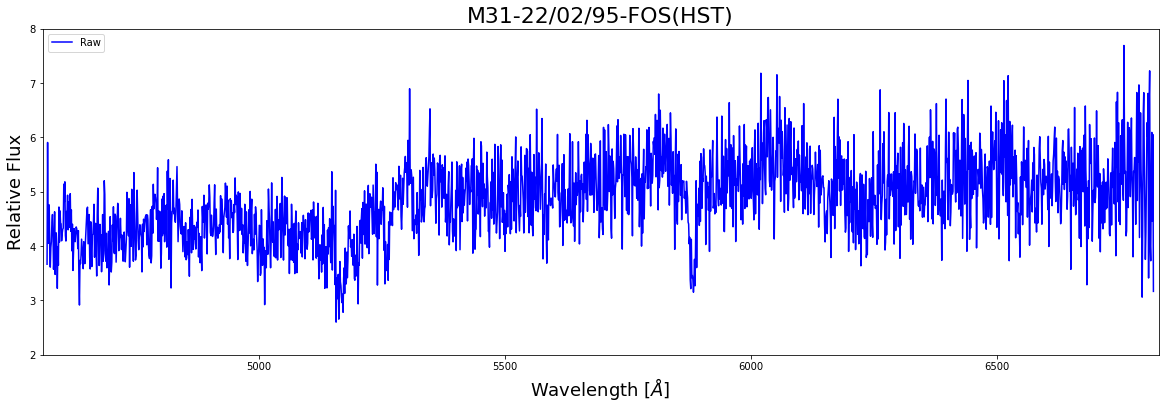

In [8]:
fig1=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(spectrum.spectral_axis,(flux_avg)*10**16,'b')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.ylim((2,8))
plt.legend(['Raw'])
plt.tick_params(axis='y', which='both')
plt.show()

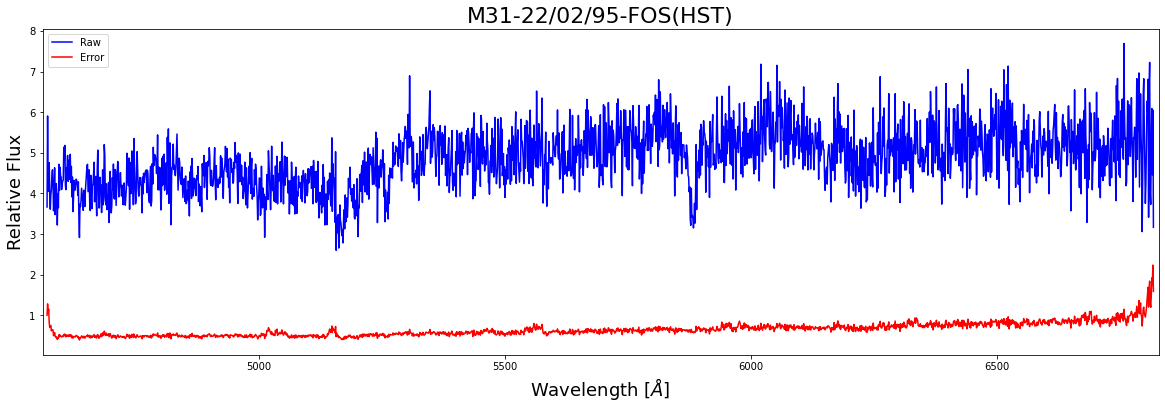

In [9]:
fig2=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(spectrum.spectral_axis,(flux_avg)*10**16,'b',spectrum.spectral_axis,err_avg*10**16,'r')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.legend(['Raw','Error'])
plt.tick_params(axis='y', which='both')
plt.show()

Error from the Data is removed.

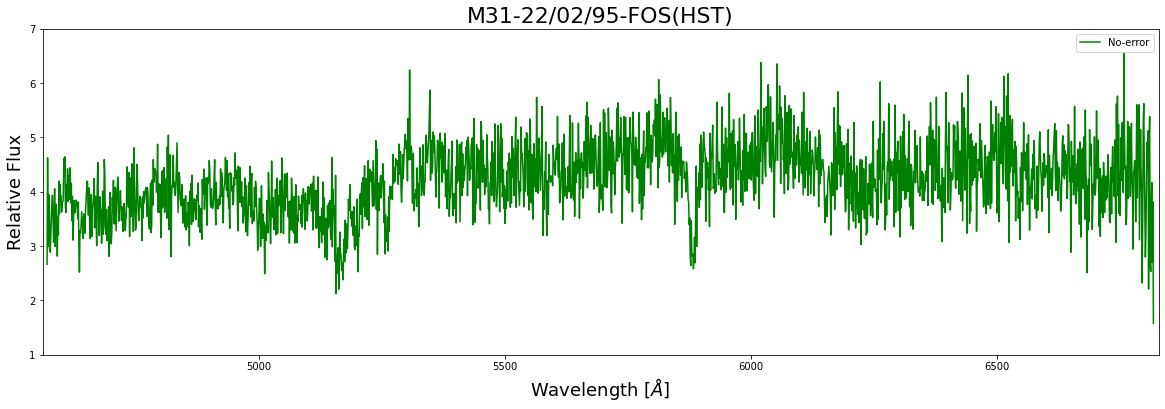

In [10]:
fig3=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(spectrum.spectral_axis,(flux_avg-err_avg)*10**16,'g')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.ylim((1,7))
plt.legend(['No-error'])
plt.tick_params(axis='y', which='both')
plt.show()

In [11]:
spectrum_no_err=Spectrum1D(spectral_axis=wave_avg,flux=(flux_avg-err_avg))

Continuum fit on the Data is done.

In [12]:
cont_fit=fit_generic_continuum(spectrum_no_err)

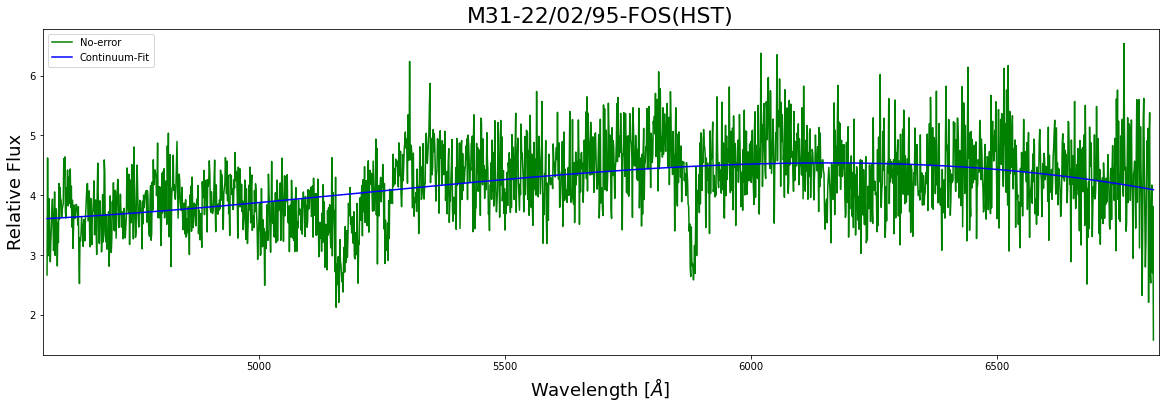

In [13]:
fig4=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(spectrum.spectral_axis,spectrum_no_err.flux*10**16,'green',spectrum.spectral_axis,cont_fit(spectrum_no_err.spectral_axis)*10**16,'blue')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.legend(['No-error','Continuum-Fit'])
plt.show()

Normalization of the Data is done.

In [14]:
norm_spec=spectrum_no_err/cont_fit(spectrum_no_err.spectral_axis)

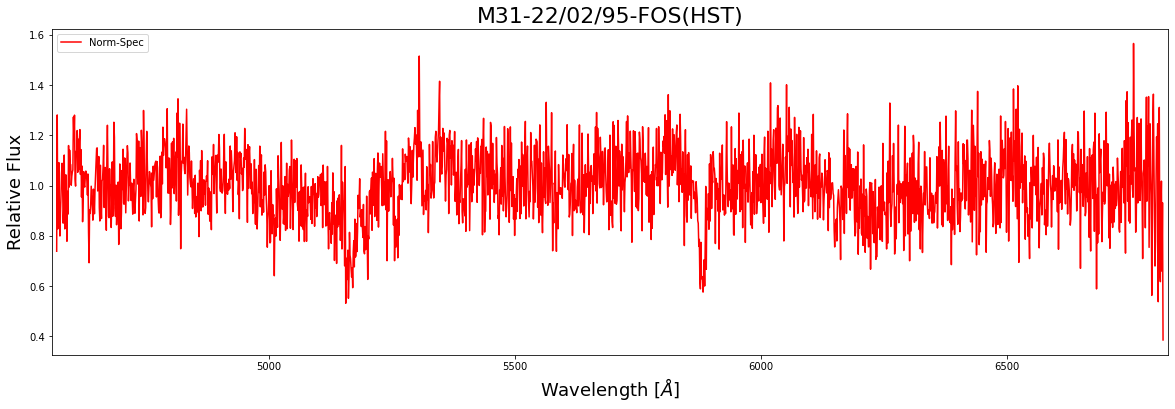

In [15]:
fig2=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(norm_spec.spectral_axis,norm_spec.flux,'r')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.legend(['Norm-Spec'])
plt.show()

Absorption regions are selected.

In [16]:
line_1=(wave_avg[1460:1550],norm_spec.flux[1460:1550])
line_2=(wave_avg[1400:1460],norm_spec.flux[1400:1460])
line_3=(wave_avg[825:900],norm_spec.flux[825:900])

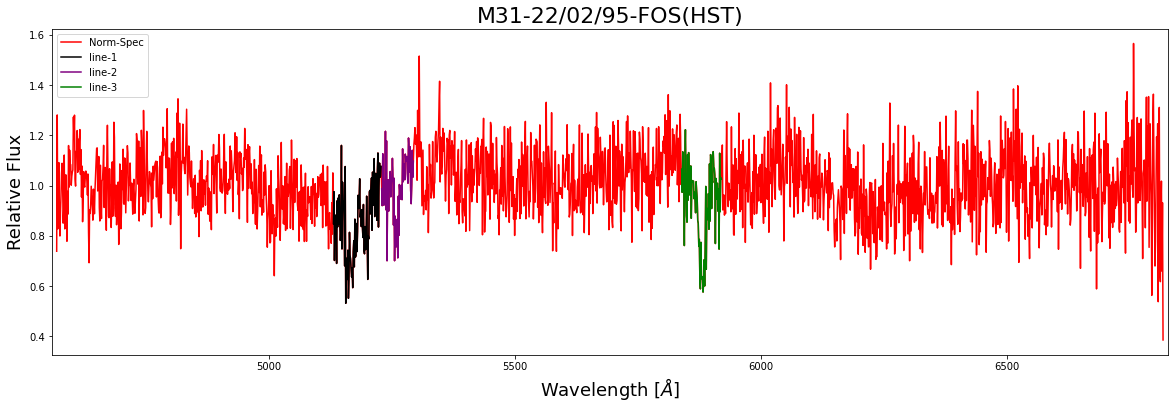

In [17]:
fig2=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(norm_spec.spectral_axis,norm_spec.flux,'r',line_1[0],line_1[1],'k',line_2[0],line_2[1],'purple',line_3[0],line_3[1],'green')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.legend(['Norm-Spec','line-1','line-2','line-3'])
plt.show()

Superimposition of the absorption on the continuum fit is performed.

In [18]:
cont=cont_fit(spectrum_no_err.spectral_axis)

In [19]:
sect_1=(wave_avg[1460:1550],spectrum_no_err.flux[1460:1550])
sect_2=(wave_avg[1400:1460],spectrum_no_err.flux[1400:1460])
sect_3=(wave_avg[825:900],spectrum_no_err.flux[825:900])

In [20]:
fit_spec=[0]*2064
for i in range(2064):
  if i>=1460 and i<1550:
    fit_spec[i]=sect_1[1].value[i-1460]
  elif i>=1400 and i<=1460:
    fit_spec[i]=sect_2[1].value[i-1400]
  elif i>=825 and i<900:
    fit_spec[i]=sect_3[1].value[i-825]
  else:
    fit_spec[i]=cont.value[i]

In [21]:
fit_spec=np.array(fit_spec)

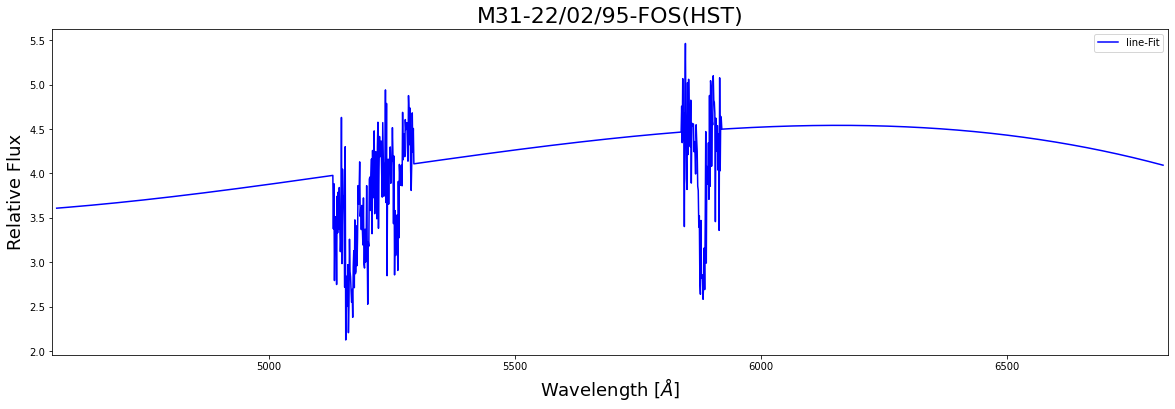

In [22]:
fig2=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(spectrum_no_err.spectral_axis,fit_spec*10**16,'blue')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.legend(['line-Fit','Continuum-Fit'])
plt.tick_params(axis='y', which='both')
plt.show()

Continuum is passed through the 1D Median Filter to smooth it out.

In [23]:
smooth=medfilt(fit_spec)

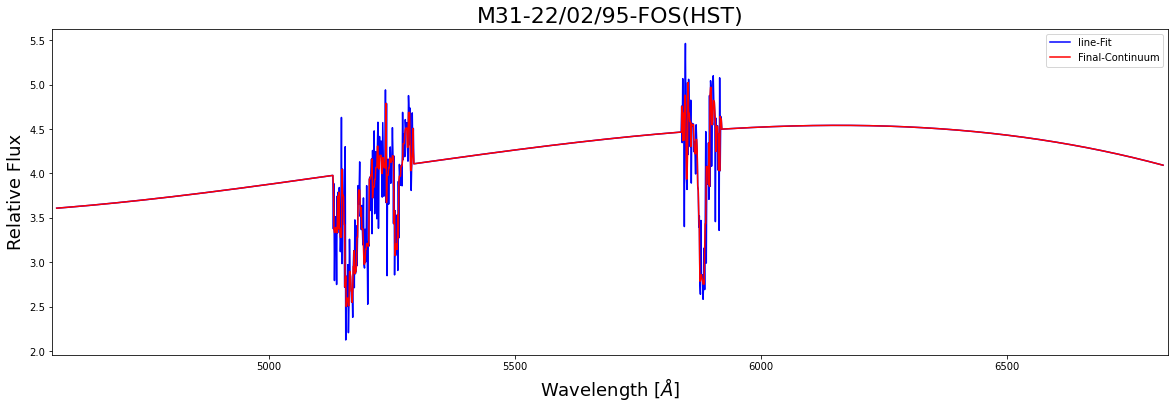

In [24]:
fig2=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(spectrum_no_err.spectral_axis,fit_spec*10**16,'blue',spectrum_no_err.spectral_axis,smooth*10**16,'red')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.legend(['line-Fit','Final-Continuum'])
plt.tick_params(axis='y', which='both')
plt.show()

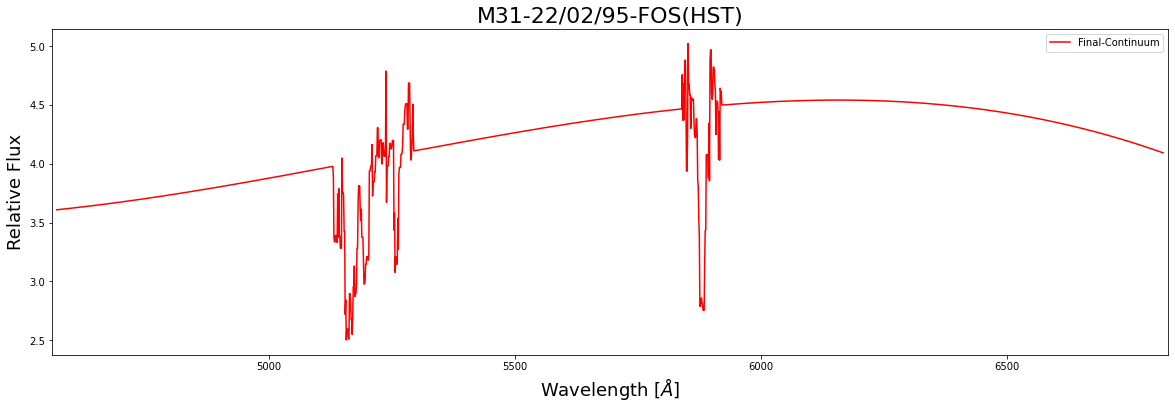

In [25]:
fig2=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(spectrum_no_err.spectral_axis,smooth*10**16,'red')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.legend(['Final-Continuum'])
plt.tick_params(axis='y', which='both')
plt.show()

In [26]:
lines=np.array([5881.654,5261.225,5195,5165])
text=np.array(['Na I','Fe I','Unkown','Mg I'])
y=[5.5,5.5,5.5,5.5]

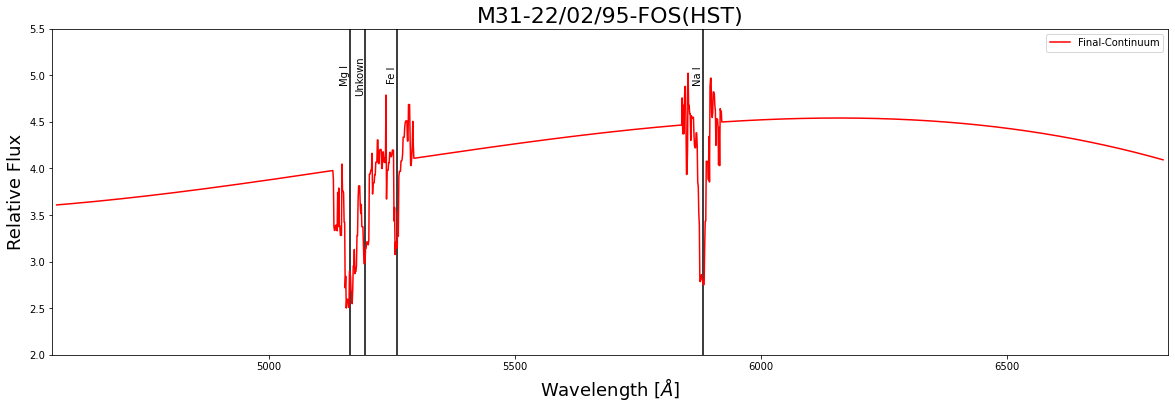

In [27]:
fig2=plt.subplots(figsize=(20,6),facecolor='white')
plt.plot(spectrum.spectral_axis,smooth*10**16,'r')

for i in range(len(lines)):
    plt.text(lines[i]-20, 5,text[i], rotation=90, verticalalignment='center')

plt.vlines(lines,0,7,'k')
plt.title("M31-22/02/95-FOS(HST)",fontsize=22)
plt.xlabel(r"Wavelength [$\AA$]",fontsize=18)
plt.ylabel(r"Relative Flux",fontsize=18,rotation=90)
plt.xlim((4560,6828))
plt.ylim((2,5.5))
plt.legend(['Final-Continuum'])
plt.tick_params(axis='y', which='both')
plt.show()